In [1]:
import string
import pandas as pd
import matplotlib.pyplot as plt

## Read training and testing data

In [2]:
data_train = pd.read_csv('data/youtoxic/youtoxic.csv', index_col=0)
print('Shape of train: ', data_train.shape)
data_train.head()

Shape of train:  (1000, 15)


,VideoId,UserId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
CommentId,,,,,,,,,,,,,,,
Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,a92f0f20-80fa-4456-af09-34bfe13803fa,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,a92f0f20-80fa-4456-af09-34bfe13803fa,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,a92f0f20-80fa-4456-af09-34bfe13803fa,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,a92f0f20-80fa-4456-af09-34bfe13803fa,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,a92f0f20-80fa-4456-af09-34bfe13803fa,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


## Explore data

How many examples of each category do we have?

In [4]:
category_cols = ['IsToxic','IsAbusive','IsHatespeech']
num_toxic_comments = data_train[category_cols].astype(bool).sum(axis=0)
untoxic_comments = data_train[category_cols].astype(bool).sum(axis=1)
num_untoxic_comments = untoxic_comments[untoxic_comments == 0].count()
print('Train set:')
print('no label\t', num_untoxic_comments)
print(num_toxic_comments)

Train set:
no label	 538
IsToxic         462
IsAbusive       353
IsHatespeech    138
dtype: int64


How long are the comments in the training set?

Mean length:  185.554
Median length:  101.0
Maximum length:  4421
Minimum length:  3


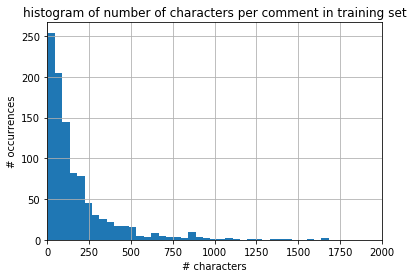

In [6]:
comment_lengths = data_train['Text'].apply(lambda x: len(x))
print('Mean length: ', comment_lengths.mean())
print('Median length: ', comment_lengths.median())
print('Maximum length: ', max(comment_lengths))
print('Minimum length: ', min(comment_lengths))

comment_lengths.hist(bins=100)
plt.title('histogram of number of characters per comment in training set')
plt.xlabel('# characters')
plt.ylabel('# occurrences')
plt.xlim(0,2000)
plt.show()

What is the rate of punctuation compared to all characters in a comment?

Mean punctuation rate:  0.03897705041519279
Median punctuation rate:  0.02786814514389265
Maximum punctuation rate:  0.7857142857142857
Minimum punctuation rate:  0.0


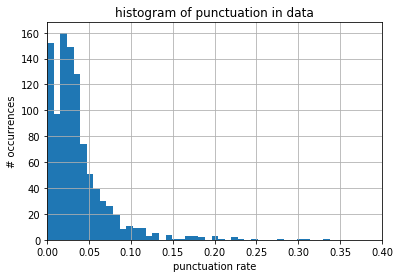

In [7]:
count_occurences = lambda c, l: sum([1 for x in c if x in l])
num_of_punctuation = data_train['Text'].apply(lambda x: count_occurences(x, string.punctuation))

punctuation_rates = (num_of_punctuation / comment_lengths)

print('Mean punctuation rate: ', punctuation_rates.mean())
print('Median punctuation rate: ', punctuation_rates.median())
print('Maximum punctuation rate: ', max(punctuation_rates))
print('Minimum punctuation rate: ', min(punctuation_rates))

punctuation_rates.hist(bins=100)
plt.title('histogram of punctuation in data')
plt.xlabel('punctuation rate')
plt.xlim(0, 0.4)
plt.ylabel('# occurrences')
plt.show()

How many exclamation marks in the training set?

Mean #exclamation marks:  0.36
Median #exclamation marks:  0.0
Maximum #exclamation marks:  12
Minimum #exclamation marks:  0


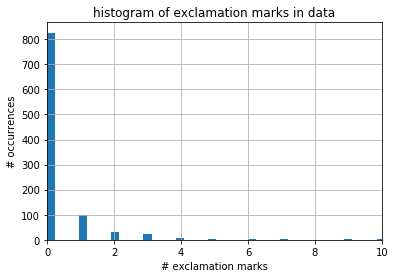

In [8]:
num_of_exclamation_marks = data_train['Text'].apply(lambda x: count_occurences(x, '!'))
print('Mean #exclamation marks: ', num_of_exclamation_marks.mean())
print('Median #exclamation marks: ', num_of_exclamation_marks.median())
print('Maximum #exclamation marks: ', max(num_of_exclamation_marks))
print('Minimum #exclamation marks: ', min(num_of_exclamation_marks))

num_of_exclamation_marks[num_of_exclamation_marks < 50].hist(bins=50)
plt.title('histogram of exclamation marks in data')
plt.xlabel('# exclamation marks')
plt.xlim(0, 10)
plt.ylabel('# occurrences')
plt.show()

Mean uppercase rate:  0.0528358178563129
Median uppercase rate:  0.02526326986490799
Maximum uppercase rate:  0.875
Minimum uppercase rate:  0.0


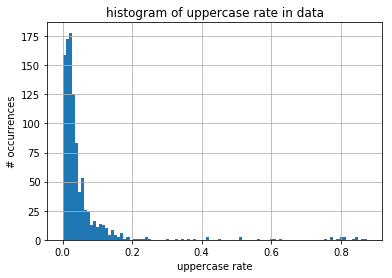

CommentId
Ugg2KwwX0V8-aXgCoAEC    0.014121
Ugg2s5AzSPioEXgCoAEC    0.036232
Ugg3dWTOxryFfHgCoAEC    0.002381
Ugg7Gd006w1MPngCoAEC    0.015464
Ugg8FfTbbNF8IngCoAEC    0.020576
Name: Text, dtype: float64

In [9]:
count_uppercase = lambda c: sum([1 for x in c if x.isupper()])
number_uppercase_characters = data_train['Text'].apply(lambda x: count_uppercase(x))
uppercase_rate = (number_uppercase_characters / comment_lengths)
print('Mean uppercase rate: ', uppercase_rate.mean())
print('Median uppercase rate: ', uppercase_rate.median())
print('Maximum uppercase rate: ', max(uppercase_rate))
print('Minimum uppercase rate: ', min(uppercase_rate))

uppercase_rate.hist(bins=100)
plt.title('histogram of uppercase rate in data')
plt.xlabel('uppercase rate')
plt.ylabel('# occurrences')
plt.show()
uppercase_rate.head()

## Examples for every category in the data

In [13]:
data_train[data_train['IsToxic'] == 1]['Text'].head(3)

CommentId
Ugg2s5AzSPioEXgCoAEC    Law enforcement is not trained to shoot to app...
Ugg3dWTOxryFfHgCoAEC    \nDont you reckon them 'black lives matter' ba...
Ugg9a6FtoXdxmXgCoAEC    here people his facebook is https://www.facebo...
Name: Text, dtype: object

In [14]:
data_train[data_train['IsAbusive'] == 1]['Text'].head(3)

CommentId
Ugg2s5AzSPioEXgCoAEC    Law enforcement is not trained to shoot to app...
Ugg3dWTOxryFfHgCoAEC    \nDont you reckon them 'black lives matter' ba...
UggBlIXoph7p-3gCoAEC    I would LOVE to see this pussy go to Staten Is...
Name: Text, dtype: object

In [15]:
data_train[data_train['IsHatespeech'] == 1]['Text'].head(3)

CommentId
Ugg9a6FtoXdxmXgCoAEC    here people his facebook is https://www.facebo...
Ugga9KzkNDGvlXgCoAEC    Check out this you tube post. "Black man goes ...
UggBlIXoph7p-3gCoAEC    I would LOVE to see this pussy go to Staten Is...
Name: Text, dtype: object